In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
advt = pd.read_csv("Advertising Budget and Sales.csv")
advt.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
advt = advt.drop('Unnamed: 0', axis = 1)
advt.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
advt.shape

(200, 4)

## Pre-Processing :

In [32]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [33]:
advt.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [34]:
advt.rename(columns={
    'TV Ad Budget ($)': 'TV',
    'Radio Ad Budget ($)': 'Radio',
    'Newspaper Ad Budget ($)': 'Newspaper',
    'Sales ($)': 'Sales'
}, inplace=True)

In [35]:
advt.sample(5)

,TV,Radio,Newspaper,Sales
105,137.9,46.4,59.0,19.2
50,199.8,3.1,34.6,11.4
82,75.3,20.3,32.5,11.3
92,217.7,33.5,59.0,19.4
114,78.2,46.8,34.5,14.6


In [36]:
advt.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
advt[['TV', 'Radio', 'Newspaper']].mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
dtype: float64

## EDA :

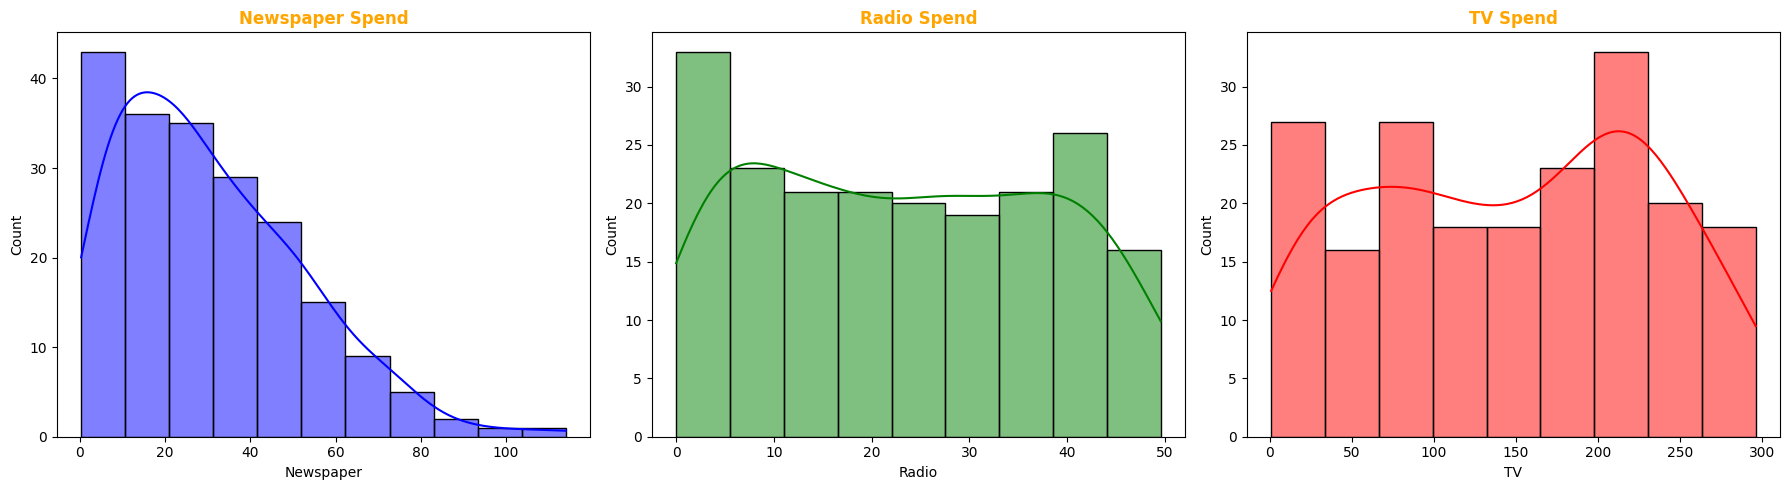

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(advt['Newspaper'], kde=True, color='blue', ax=axes[0])
axes[0].set_title("Newspaper Spend",fontweight='bold',color='orange')

sns.histplot(advt['Radio'], kde=True, color='green', ax=axes[1])
axes[1].set_title("Radio Spend",fontweight='bold',color='orange')

sns.histplot(advt['TV'], kde=True, color='red', ax=axes[2])
axes[2].set_title("TV Spend",fontweight='bold',color='orange')

plt.tight_layout()
plt.show()

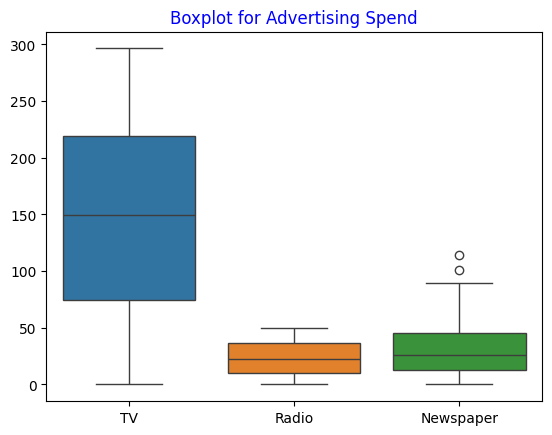

In [12]:
#checking for outliers
sns.boxplot(data=advt[['TV','Radio','Newspaper']])
plt.title("Boxplot for Advertising Spend",color='blue')
plt.show()

In [13]:
#Treating Outliers
Q1 = advt['Newspaper'].quantile(0.25)
Q3 = advt['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
outliers  = advt[(advt['Newspaper'] < (Q1 - 1.5 * IQR)) | (advt['Newspaper'] > (Q3 + 1.5 * IQR))]
outliers

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [14]:
advt = advt[~advt.index.isin(outliers.index)]
advt.shape

(198, 4)

## Model Building :

In [16]:
X = advt[['TV', 'Radio', 'Newspaper']]  #Input Featrues
y = advt['Sales']  #Target Feature

In [17]:
#Standardization
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(158, 3) (40, 3) (158,) (40,)


In [20]:
# Training the model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regr.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.3f}")

Mean Squared Error: 2.741
Mean Absolute Error: 1.250
R2 Score: 0.899


In [22]:
# Take input from user for each feature
tv = float(input("Enter TV Ad Budget ($): "))
radio = float(input("Enter Radio Ad Budget ($): "))
newspaper = float(input("Enter Newspaper Ad Budget ($): "))

# Create a DataFrame for the input
input_df = pd.DataFrame([[tv, radio, newspaper]], columns=['TV', 'Radio', 'Newspaper'])

# Standardize the input using the previously fitted scaler
input_std = sc.transform(input_df)

# Predict sales
predicted_sales = regr.predict(input_std)
print(f"✅Predicted Sales ($): {predicted_sales[0]:.2f}")

✅Predicted Sales ($): 12.31


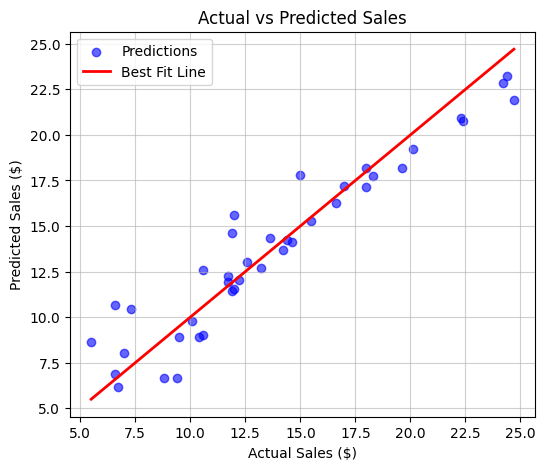

In [54]:
# Predicted vs Actual plot with best fit line
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Best Fit Line')
plt.xlabel('Actual Sales ($)')
plt.ylabel('Predicted Sales ($)')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True,alpha=0.6)
plt.show()